In [5]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd 



In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [7]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [8]:
df = pd.read_html(url, index_col=0)[0]
#df=pd.read_html(url)[0]
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   terrestrial_date  1867 non-null   object 
 1   sol               1867 non-null   int64  
 2   ls                1867 non-null   int64  
 3   month             1867 non-null   int64  
 4   min_temp          1867 non-null   float64
 5   pressure          1867 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 102.1+ KB


In [11]:
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1 KB


In [13]:
month_mars = df['month'].value_counts()
month_mars_num=len(month_mars)

In [14]:
print(f'There are {month_mars_num} months on Mars.')

There are 12 months on Mars.


In [15]:
start_date = df['sol'].min()
end_date = df['sol'].max()

In [16]:
duration = end_date - start_date
duration

1967

In [17]:
print(f'There are {duration} Martian days worth of data existing in the scraped dataset.' )

There are 1967 Martian days worth of data existing in the scraped dataset.


In [18]:
avg_temp_monthly = df.groupby(['month'])['min_temp'].mean()
avg_temp_monthly

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

(-90.0, 0.0)

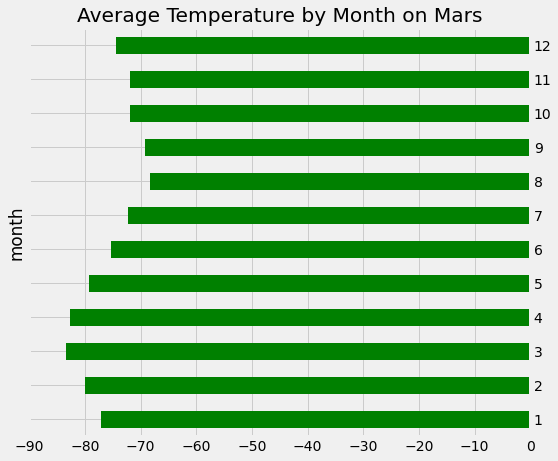

In [32]:
from calendar import month



plt1= avg_temp_monthly.plot.barh(title ='Average Temperature by Month on Mars', ylabel = 'average temperature(Celsius)', color="green", figsize=(8, 7))

plt1.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt1.set_xlim([-90,0])





In [20]:
print("Summary: we can conclude from the bar chart, on average, the lowest temperature is in March and the highest temperature is in August on Mars.  ")

Summary: we can conclude from the bar chart, on average, the lowest temperature is in March and the highest temperature is in August on Mars.  


In [21]:
avg_pressure_df =df.groupby(['month'])['pressure'].mean()


(0.0, 900.0)

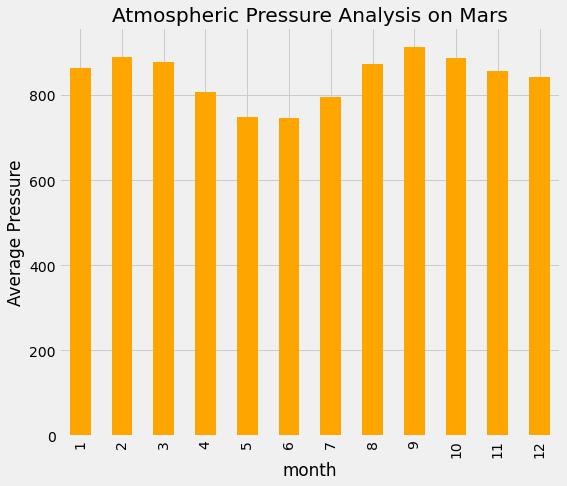

In [34]:
plot2= avg_pressure_df.plot(kind= 'bar', ylabel='Average Pressure', title='Atmospheric Pressure Analysis on Mars', color="orange", figsize=(8, 7))
plt1.set_ylim([0,900])



In [23]:
print("The monthly average pressure on Mars is the lowest in June and July, on the contrary, the highest is in September")

The monthly average pressure on Mars is the lowest in June and July, on the contrary, the highest is in September


<AxesSubplot:xlabel='sol'>

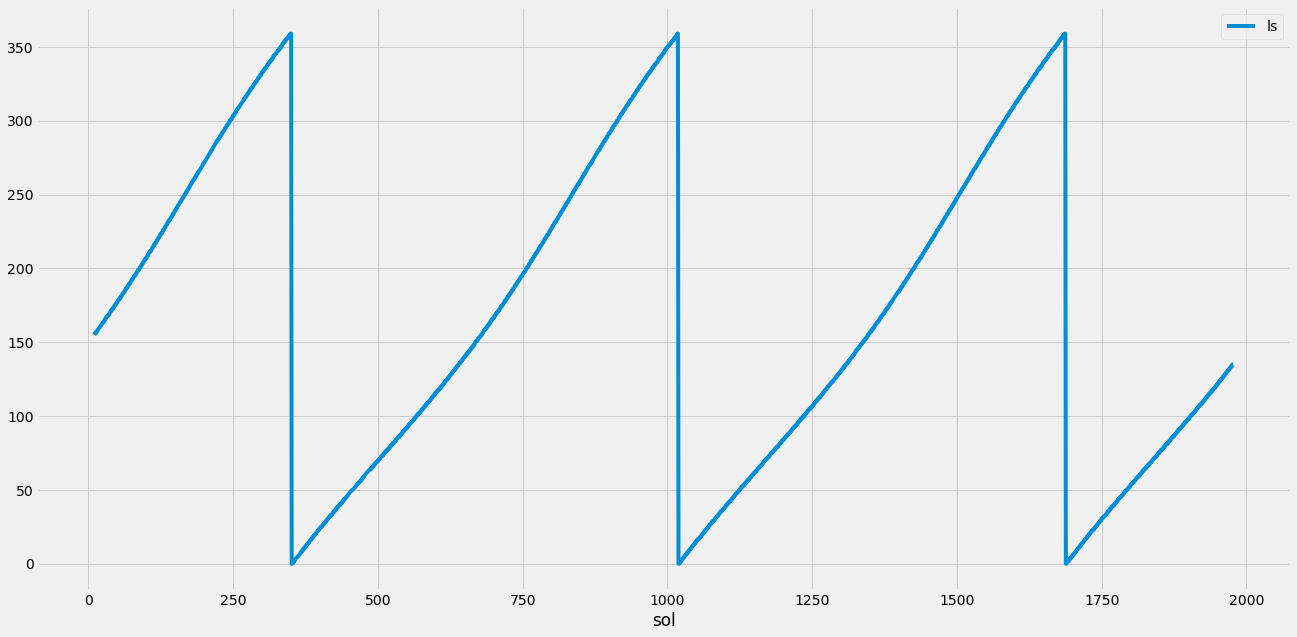

In [26]:
from re import X
from tkinter import Y


df.plot(y = 'ls', x= "sol", figsize=(20,10))

In [27]:
df.loc[df['ls']== 0]['sol']

id
320      351
319      352
954     1019
938     1020
1606    1688
1610    1689
Name: sol, dtype: int64

In [28]:
((1019-351)+(1688-1019))/2

668.5

In [38]:

df.to_csv('mars_data_part2.csv', encoding='utf-8')

